# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Import `passengers.csv` and view the head.

In [3]:
# Read the dataset 'passengers.csv' and view the head
df = pd.read_csv('passengers.csv')

df.head()

# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [45]:
# Set month column as a timeseries object, and make it the index
df['Month']=pd.to_datetime(df['Month'], box=True, format='%Y/%m/%d', utc=True)

In [46]:
# check the head and the new index


# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually inspect this time-series.

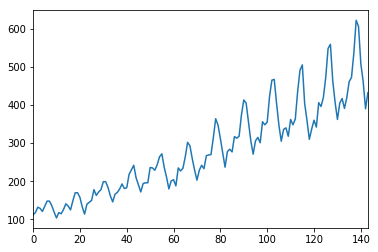

In [47]:
# Plot the time series data 
df['#Passengers'].plot()

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

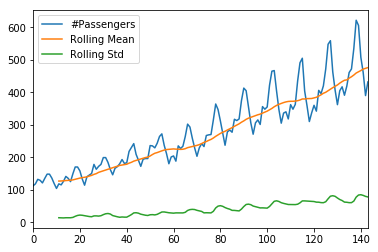

In [48]:
#Determine rolling statistics

ax=df['#Passengers'].plot()
df['#Passengers'].rolling(window=12).mean().plot(ax=ax, label="Rolling Mean")
df['#Passengers'].rolling(window=12).std().plot(ax=ax, label="Rolling Std")
plt.legend()

In [49]:
#Plot rolling statistics


Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [54]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
adfuller(df['#Passengers'].rolling(window=12).std().dropna())

# Extract and display test results in a user friendly manner

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

(1.28686894196697,
 0.9965343927018504,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 426.1982989344186)

## Conclusion here

This is not stationary. The p value is really high, so we can't rule out the null hypothesis and the null hypothesis is that it is not stationary.

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

(-2.5001512521613605,
 0.11543752781211608,
 0,
 60,
 {'1%': -3.5443688564814813,
  '5%': -2.9110731481481484,
  '10%': -2.5931902777777776},
 -416.4958148446875)

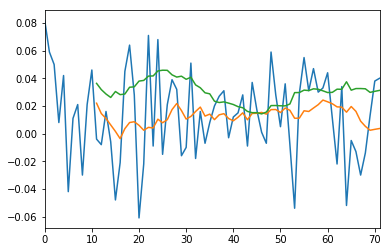

In [86]:
NY = pd.read_csv('NYSE_monthly.csv')
NY['Month'] = pd.to_datetime(NY['Month'],)
NY.set_index(NY['Month'])

rm = NY['monthly_return'].rolling(window=12).mean()
rs = NY['monthly_return'].rolling(window=12).std()

NY['monthly_return'].plot()
rm.plot()
rs.plot()

adfuller(rm.dropna())

## Summary

In this lab, you learned to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!